In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def step_grad(eta, R, K, M=8192, left=0.1, right=1, sigma=0.1, binary=True):
  relu = lambda x: x * (x >= 0)
  grad = lambda x: left * x + (right-left) * relu(x)
  f = lambda x: 1/2* (left * x**2 + (right-left) * relu(x)**2)

  x = np.zeros((R, K, M))
  # x = np.random.randn(T,M)

  for r in range(R):
    for k in range(1, K):
      noise = sigma * (np.round(np.random.rand(M)) * 2 - 1 if binary else np.random.randn(M))
      x[r, k, :] = x[r, k-1, :] - eta * (grad(x[r, k-1, :]) + noise)
    if r+1 < R:
      x[r+1, 0, :] = np.mean(x[r, -1, :])

  # for t in range(1,T):
  #   x[t,:] = x[t-1,:] - eta*(grad(x[t-1]) + noise)
  return x

In [ ]:
res_eta = {eta: step_grad(eta=eta, R=1, K=1025, M=65535, sigma=0.1,left=0.5,right=1) for eta in [0.0001, 0.001, 0.01]}

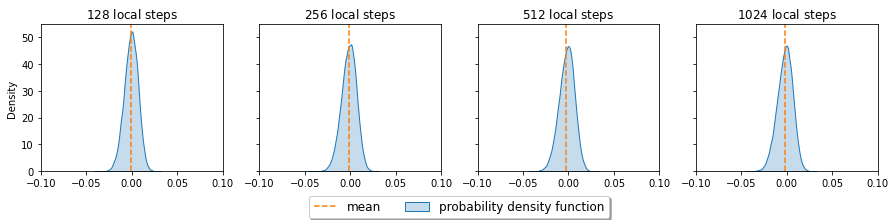

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3), sharey=True)

eta = 0.01
for ax, K in zip(axes, [128, 256, 512, 1024]):
  sns.kdeplot(res_eta[eta][0, K, :], ax=ax, shade=True, label='probability density function')
  avg = np.mean(res_eta[eta][0, K, :])
  ax.axvline(avg, ymin=0, ymax=30, color='C1', linestyle='--', label='mean')
  ax.set_title(f'${K}$ local steps')
  ax.set_xlim([-0.1, 0.1])

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.425, -0.02), fancybox=True, shadow=True, fontsize='large')
plt.subplots_adjust(bottom=0.2)
plt.savefig('drift.png')